### 2.1 인공 뉴런 : 초기 머신 러닝의 간단한 역사

#### 2.1.1 인공 뉴련의 수학적 정의

뉴런 작동 원리 : 수상 돌기에 여러 신호가 도착하면 세포체에서 합쳐짐 -> 합쳐진 신호가 특정 임계 값을 넘으면 출력 신호가 생성 -> 축삭 돌기를 이용해 전달   
=> 인공 뉴런 아이디어 : 0과 1 두 개의 클래스가 있는 이진 분류 작업 -> 입력값 $x$와 이에 상응하는 가중치 벡터 $w$의 선형 조합으로 결정함수 $σ(z)$를 정의   
=> 최종 입력인 $z = w_1x_1 + ... + w_xx_m$   
   
   
$w = \begin{align} \notag
\begin{bmatrix} 
   w_{1}  \\
   w_{2}  \\
   w_{3}  \\
   \end{bmatrix} 
   ,x = \begin{bmatrix} 
   x_{1}  \\
   x_{2}  \\
   x_{3}  \\
   \end{bmatrix} 
   \end{align}
$

특정 샘플 $x^(i)$의 최종 입력이 사전에 정의된 임계값 θ보다 크면 클래스 1로 예측, 아니면 클래스 0으로 예측   
결정 함수 $σ(·)$는 단위 계단 함수를 변형한 것

$\begin{align}\notag σ(·)=\begin{cases}1 & z \geq θ\\0 & 그외\end{cases}\end{align}$<br/><br/> 
$\begin{align}z \geq θ → z - θ \geq 0\end{align}$
$\begin{align}z = w_1x_1 + ... + w_mx_m + b = w^Tx + b\end{align}$
$\begin{align} σ(z)=\begin{cases}1 & z \geq θ\\0 & 그외\end{cases}\end{align}$

#### 2.1.2 퍼셉트론 학습 규칙

<strong>퍼셉트론 알고리즘</strong>
1. 가중치를 0 또는 랜덤한 작은 값으로 초기화   
2. 각 훈련 샘플 $x^(i)$에서 다음 작업을 수행   
    a. 출력 값 $\hat{y}$를 계산   
    b. 가중치와 절편을 업데이트   

출력 값 : 앞서 정의한 단위 계단 함수로 예측한 클래스 레이블   
가중치 벡터 $w$에 있는 개별 가중치 $w_j$와 절편 유닛이 동시에 업데이트되는 것을 다음과 같이 쓸 수 있음   
$\begin{align} \notag w_j := w_j + △w_j\end{align}$
$\begin{align} \notag b := b + △b\end{align}$
   
업데이트 값("델타")은 다음과 같이 계산   
$\begin{align} \notag △w_j = η(y^{(i)} - \hat{y}^{(i)})x_j^{(i)}\end{align}$
$\begin{align} \notag △b = η(y^{(i)} - \hat{y}^{(i)})\end{align}$

- η : 학습률(일반적으로 0.0에서 1.0 사이 실수)   
- $y^(i)$ : i번째 훈련 샘플의 진짜 클래스 레이블   
- $\hat{y}^(i)$ : i번째 훈련 샘플의 예측 클래스 레이블   
<p><strong>모든 가중치와 절편 유닛을 동시에 업데이트</strong></p>

$\begin{align} \notag △w_1 = η(y^{(i)} - output^{(i)})x_1^{(i)}\end{align}$
$\begin{align} \notag △w_2 = η(y^{(i)} - output^{(i)})x_2^{(i)}\end{align}$
$\begin{align} \notag △b = η(y^{(i)} - output^{(i)})\end{align}$

![](image/퍼셉트론.jpg)

### 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

#### 2.2.1 객체 지향 퍼셉트론 API
Perceptron 객체를 초기화한 후 fit 메서드로 데이터에서 학습, 별도의 predict 메서드로 예측을 만듦

In [1]:
import numpy as np

class Perceptron() :
    """ 퍼셉트론 분류기
    
    매개변수
    ------------
    eta : float
        학습률(0.0과 1.0 사이)
    
    n_iter : int
        훈련 데이터셋 반복 횟수

    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    ------------
    w_ : 1d-array
        학습된 가중치
    
    b_ : 스칼라
        학습된 절편 유닛

    errors_ : list
        에포크마다 누적된 분류 오류
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1) :
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y) :
        """ 훈련 데이터 학습
        
        매개변수
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터

        y : array-like, shape = [n_samples]
            타깃 값

        반환값
        ------------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.1, size = X.shape[1]) # 가중치를 벡터 R^m(데이터셋의 차원(특성) 개수)으로 초기화, 표준 편차가 0.01인 정규분포에서 뽑은 랜덤한 작은 수, rgen : numpy 난수 생성기
        self.b_ = np.float64(0.) # 절편을 0으로 초기화
        self.errors_ = [] # 에포크마다 잘못 분류된 횟수를 기록

        for _ in range(self.n_iter) :
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def net_input(self, X):
        """ 입력 계산 """
        return np.dot(X, self.w_) + self.b_

    def predict(self, X) :
        """ 단위 계단 함수를 사용하여 클래스 레이블을 반환 """
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [2]:
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))) # arccos : 역코사인 함수, np.linalg.norm : 벡터 길이를 계산하는 함수


np.float64(0.0)

#### 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련

In [3]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("URL : ", s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df

URL :  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


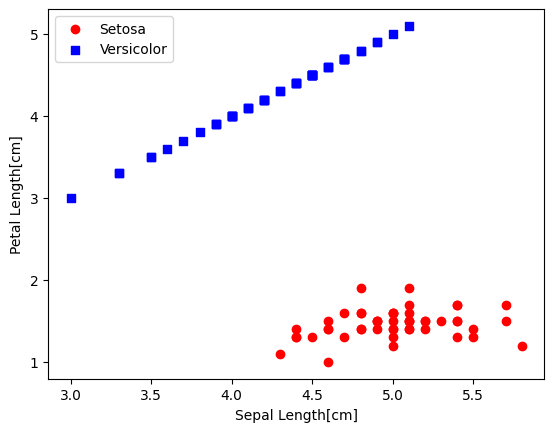

In [4]:
# 50개의 iris-setosa와 50개의 iris-versicolor 꽃에 해당하는 처음 100개의 클래스 레이블을 추출
# 클래스 레이블을 두 개의 정수 클래스1(versicolor)과 0(setosa)으로 바꾼 후 벡터 y에 저장
import matplotlib.pyplot as plt
import numpy as np
# setosa와 versicolor를 선택
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# 꽃받침 길이와 꽃잎 길이를 추출
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:, 1], X[50:, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal Length[cm]')
plt.ylabel('Petal Length[cm]')
plt.legend(loc='upper left')
plt.show()

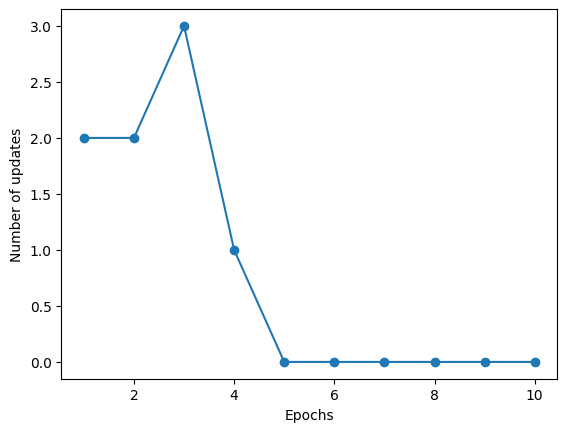

In [5]:
# 데이터셋에서 추출한 일부 데이터에서 퍼셉트론 알고리즘을 훈련
## 에포크 대비 잘못 분류된 오차를 그래프로 그려서, 알고리즘이 수렴하여 두 붓꽃 클래스를 구분하는 결정 경계를 찾는지 확인
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# 5번째 에포크 이후에 수렴, 훈렴 샘플을 아ㅗㄴ벽하게 분류류

In [6]:
# 2차원 데이터셋의 결정 경계를 시각화
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 마커와 컬러맵을 설정
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그림
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그림
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label=f"Class {cl}", edgecolor='black')

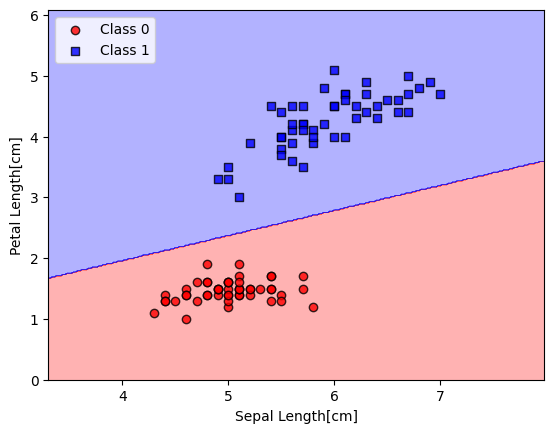

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length[cm]')
plt.ylabel('Petal Length[cm]')
plt.legend(loc='upper left')
plt.show()

### 2.3 적응형 선형 뉴런과 학습의 수렴

- 아달린(퍼셉트론의 향상된 버전) : 단위 계단 함수 대신 선형 활성화 함수($σ(z)$)를 사용   
- 아달린에서 선형 활성화 함수($σ(z)$)은 단순한 항등 함수($σ(z) = z$)   
- 아달린 알고리즘은 진짜 클래스 레이블과 <strong>선형 활성화 함수</strong>의 실수 출력 값을 비교하여 모델의 오차를 계산, 가중치 업데이트   
![](image/퍼셉트론VS아달린.jpg)

#### 2.3.1 경사 하강법으로 손실 함수 최소화

지도 학습 알고리즘의 핵심 구성 요소 : 목적 함수(최소화하려는 손실 함수 또는 비용 함수)

아달린은 평균 제곱오차로 손실 함수 L을 정의
$\begin{align} \notag 
    L(w,b) = \frac{1}{n}\sum_{i=1}^N (y^{(i)}-σ(z^{(i)}))^2
\end{align}$


#### 2.3.2 파이썬으로 아달린 구현

In [15]:
class AdalineGD() :
    """ 적응형 선형 뉴런 분류기
    
    매개변수
    ------------
    eta : float
        학습률(0.0과 1.0 사이)
    
    n_iter : int
        훈련 데이터셋 반복 횟수

    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    ------------
    w_ : 1d-array
        학습된 가중치
    
    b_ : 스칼라
        학습된 절편 유닛

    errors_ : list
        에포크마다 누적된 분류 오류
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y) :
        """ 훈련 데이터 학습
        
        매개변수
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터

        y : array-like, shape = [n_samples]
            타깃 값

        반환값
        ------------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.1, size = X.shape[1]) # 가중치를 벡터 R^m(데이터셋의 차원(특성) 개수)으로 초기화, 표준 편차가 0.01인 정규분포에서 뽑은 랜덤한 작은 수, rgen : numpy 난수 생성기
        self.b_ = np.float64(0.) # 절편을 0으로 초기화
        self.losses_ = []

        for _ in range(self.n_iter) :
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """ 최종 입력 계산 """
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """ 선형 활성화 계산 """
        return X

    def predict(self, X) :
        """ 단위 계단 함수를 사용하여 클래스 레이블을 반환 """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

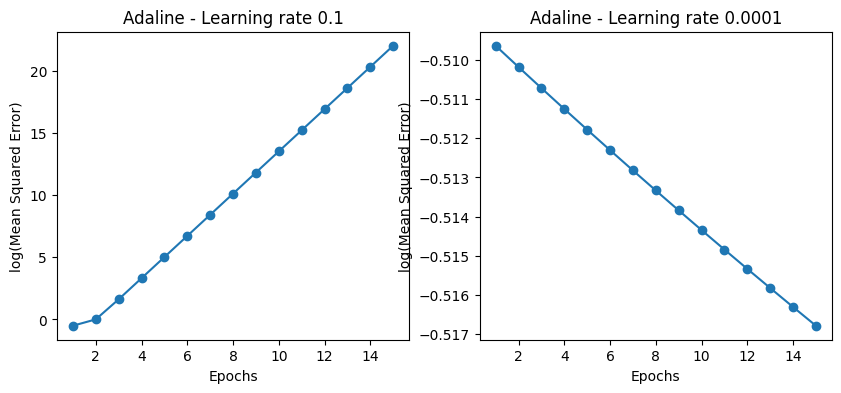

In [16]:
# 두 학습률에서 에포크 횟수 대비 손실 그래프
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean Squared Error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean Squared Error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()
# 왼쪽의 문제점 : 학습률이 너무 커 손실 함수를 치소화하지 못하고 MSE가 에포크마다 점점 커짐
# 오른쪽의 문제점 : 학습률이 너무 작아 아주 많은 에포크 필요

![](image/올바른%20학습률.jpg)

#### 2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상

표준화 사용 -> 경사하강법 학습이 좀 더 빠르게 수렴되도록 도움

In [17]:
X_std = np.copy(X)
X_std[:,0] = (X[:, 0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:, 1] - X[:,1].mean()) / X[:,1].std()
X_std

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.11120129, -0.94497788],
       [-1.05093052, -0.87559625],
       [-1.05093052, -1.01435952],
       [-1.8340382 , -1.22250442],
       [ 0.51528486, -1.15312279],
       [ 0.35866332, -0.94497788],
       [-0.11120129, -1.08374115],
       [-0.5810659 , -1.01435952],
       [ 0.35866332, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-0.11120129, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-1.36417359, -1.29188606],
       [-0.5810659 , -0.80621461],
       [-1.05093052, -0.66745134],
       [-0.73768744, -0.87559625],
       [-0.73768744, -0.87559625],
       [-0.42444437, -0.94497788],
       [-0.42444437,

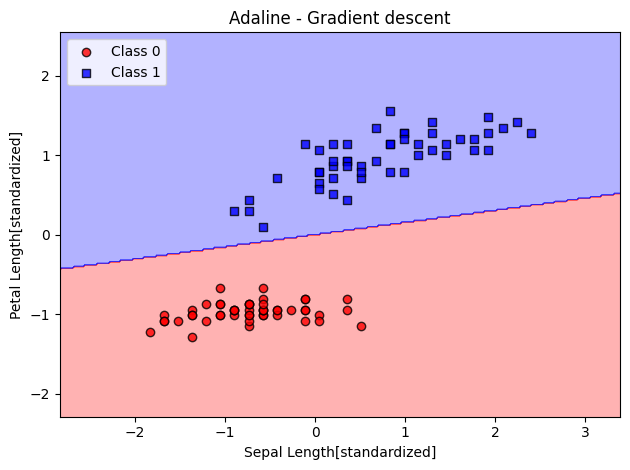

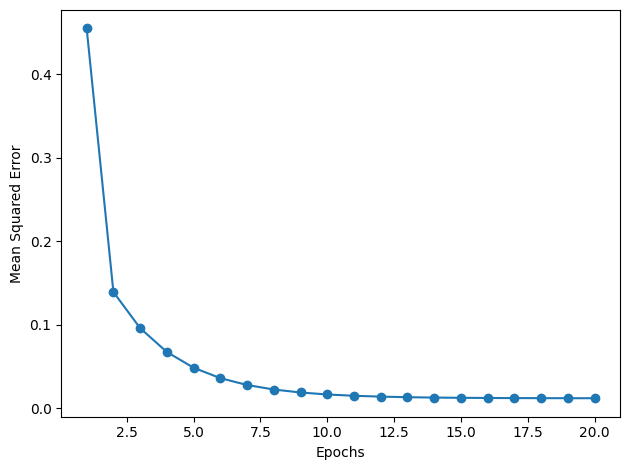

In [18]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - Gradient descent")
plt.xlabel("Sepal Length[standardized]")
plt.ylabel("Petal Length[standardized]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

#### 2.3.4 대규모 머신 러닝과 확률적 경사 하강법

- 완전 배치 경사 하강법 : <strong>전체 훈련 데이터셋</strong>에서 계산한 그레이디언트의 반대 방향으로 한 걸음씩 진행하여 손실 함수를 최소화하는 방법 => 계산 비용이 매우 많이 듬
- 확률적 경사 하강법 : 각 훈련 샘플에 대해 점진적으로 파라미터를 업데이트(가중치가 더 자주 업데이트되기 때문에 수렴 속도가 훨씬 빠름)<br/>
    온라인 학습(새로운 훈련 데이터가 도착하는 대로 훈련) 사용 가능

In [23]:
class AdalineSGD() :
    """ ADAptive Linear Neuron 분류기
    
    매개변수
    ------------
    eta : float
        학습률(0.0과 1.0 사이)
    
    n_iter : int
        훈련 데이터셋 반복 횟수

    shuffle : bool(default : True)
        Ture로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞음음

    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    ------------
    w_ : 1d-array
        학습된 가중치
    
    b_ : 스칼라
        학습된 절편 유닛

    errors_ : list
        에포크마다 누적된 분류 오류
    """
    def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y) :
        """ 훈련 데이터 학습
        
        매개변수
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터

        y : array-like, shape = [n_samples]
            타깃 값

        반환값
        ------------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []

        for _ in range(self.n_iter) :
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X,y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)            
        return self
    
    def partial_fit(self, X, y):
        """ 가중치를 다시 초기화하지 않고 훈련 데이터를 학습 """
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """ 훈련 데이터를 섞음 """
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """ 랜덤한 작은 수로 가중치를 초기화 """
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """ 아달린 학습 규칙을 적용하여 가중치를 업데이트 """
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * error
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        """ 최종 입력 계산 """
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """ 선형 활성화 계산 """
        return X

    def predict(self, X) :
        """ 단위 계단 함수를 사용하여 클래스 레이블을 반환 """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

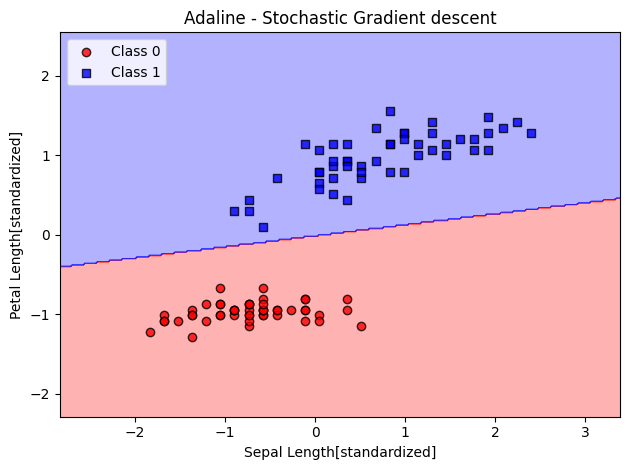

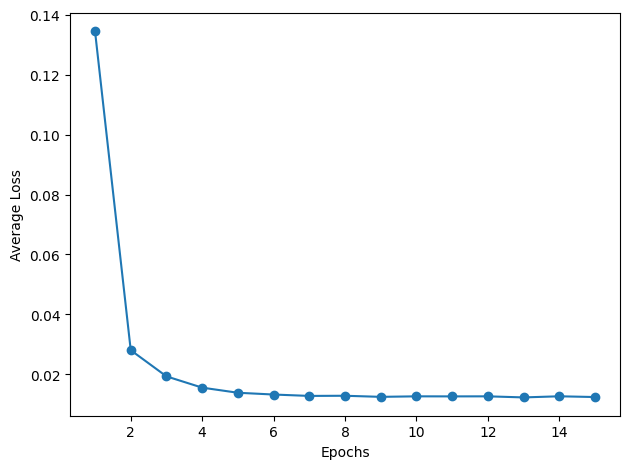

In [25]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastic Gradient descent")
plt.xlabel("Sepal Length[standardized]")
plt.ylabel("Petal Length[standardized]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.tight_layout()
plt.show()